In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("train_data_complete.csv")

In [7]:
print(data.shape)
data.head()

(762, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [8]:
data.dtypes

Date     object
count     int64
dtype: object

In [9]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index=data['Date']

#### Exploring Data

In [12]:
print(data.dtypes)
data.head()

Date     datetime64[ns]
count             int64
dtype: object


,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


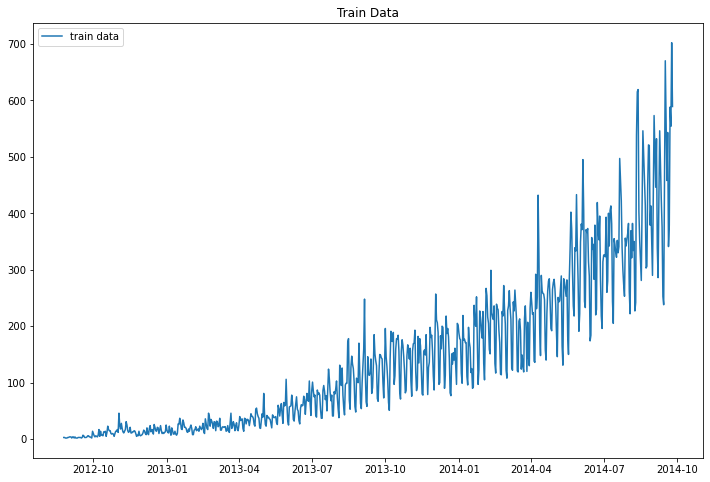

In [13]:
plt.figure(figsize=(12,8))

plt.plot(data.Date,data['count'],label='train data')

plt.legend(loc='best')
plt.title('Train Data')
plt.show()

In [15]:
data.shape

(762, 2)

###### Check for Missing Values

In [17]:
data['Date'].min(),data['Date'].max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-09-25 00:00:00'))

In [18]:
data['Date'].max()-data['Date'].min() #i.e No missing values
# Didn't inclue 25-8-12

Timedelta('761 days 00:00:00')

In [19]:
data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [21]:
data['Date'].dt.year.head()  ##provides Year

Date
2012-08-25    2012
2012-08-26    2012
2012-08-27    2012
2012-08-28    2012
2012-08-29    2012
Name: Date, dtype: int64

In [22]:
data['Date'].dt.day.head()

Date
2012-08-25    25
2012-08-26    26
2012-08-27    27
2012-08-28    28
2012-08-29    29
Name: Date, dtype: int64

In [23]:
data['Date'].dt.dayofweek.head()

Date
2012-08-25    5
2012-08-26    6
2012-08-27    0
2012-08-28    1
2012-08-29    2
Name: Date, dtype: int64

###### Adding features to the data

In [24]:
data_feat=pd.DataFrame({"year":data['Date'].dt.year,
                       "month":data['Date'].dt.month,
                       "day":data['Date'].dt.day,
                       "dayofyear":data['Date'].dt.dayofyear,
                       "week":data['Date'].dt.week,
                       "weekday":data['Date'].dt.dayofweek,
                       "quarter":data['Date'].dt.quarter,
                       })

In [25]:
data_feat.head()

,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,
2012-08-25,2012,8,25,238,34,5,3
2012-08-26,2012,8,26,239,34,6,3
2012-08-27,2012,8,27,240,35,0,3
2012-08-28,2012,8,28,241,35,1,3
2012-08-29,2012,8,29,242,35,2,3


In [61]:
complete_data=pd.concat([data_feat,data['count']],axis=1)
complete_data.head()

,year,month,day,dayofyear,week,weekday,quarter,count
Date,,,,,,,,
2012-08-25,2012,8,25,238,34,5,3,3
2012-08-26,2012,8,26,239,34,6,3,3
2012-08-27,2012,8,27,240,35,0,3,2
2012-08-28,2012,8,28,241,35,1,3,2
2012-08-29,2012,8,29,242,35,2,3,2


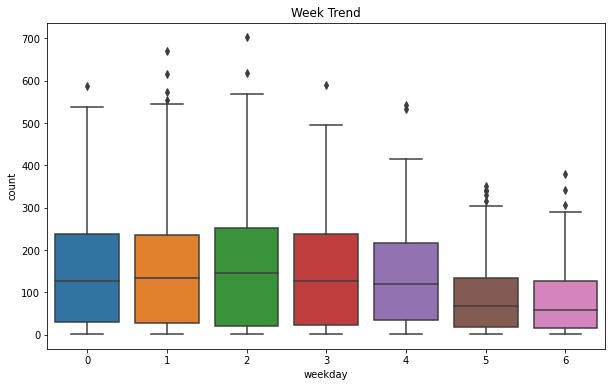

In [27]:
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_Data['weekday'],y=complete_Data['count'])


plt.title('Week Trend')
plt.show()


##count is lower on Saturday and Sunday
## Avg count is higher on weekdays

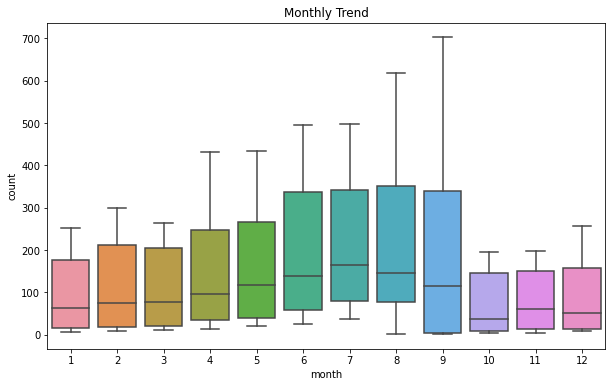

In [28]:
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_Data['month'],y=complete_Data['count'])


plt.title('Monthly Trend')
plt.show()


##The first and last months have observed a significantly lower average count

In [29]:
quarter_avg=pd.DataFrame(complete_Data.groupby('quarter')['count'].mean())
quarter_avg

,count
quarter,
1,101.700000
2,159.324176
3,201.601852
4,79.630435


           count
year            
2012   10.728682
2013   77.841096
2014  282.481343


<AxesSubplot:xlabel='year'>

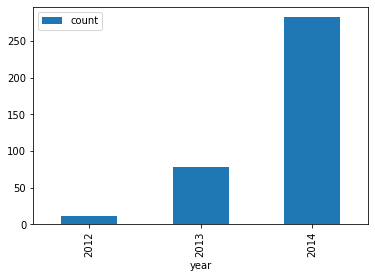

In [30]:
yearly_avg=pd.DataFrame(complete_Data.groupby('year')['count'].mean())
print(yearly_avg)
yearly_avg.plot(kind='bar')

#### Hold-Out Validation

In [31]:
train_data=data[:578]
valid_data=data[578:]

In [33]:
print(train_data.shape),print(valid_data.shape)

(578, 2)
(184, 2)


(None, None)

In [34]:
train_data.tail()

,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [35]:
valid_data.head()

,Date,count
Date,,
2014-03-26,2014-03-26,198
2014-03-27,2014-03-27,120
2014-03-28,2014-03-28,207
2014-03-29,2014-03-29,145
2014-03-30,2014-03-30,130


In [36]:
valid_data.tail()

,Date,count
Date,,
2014-09-21,2014-09-21,379
2014-09-22,2014-09-22,588
2014-09-23,2014-09-23,554
2014-09-24,2014-09-24,702
2014-09-25,2014-09-25,589


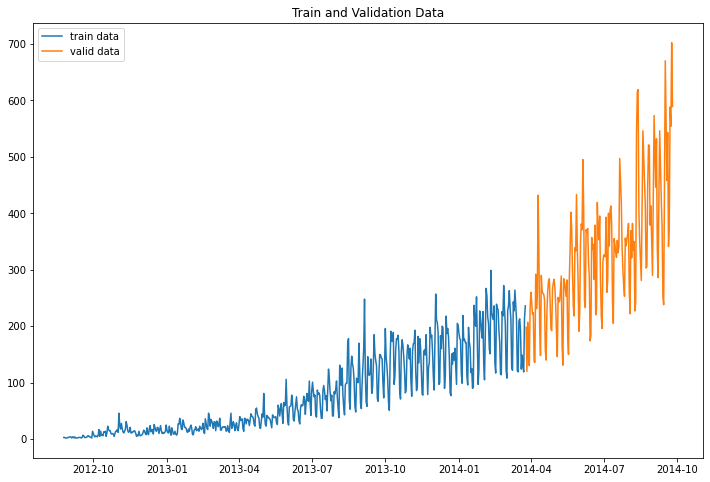

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.legend(loc='best')
plt.title('Train and Validation Data')
plt.show()

#### Time Series Cross Validation

In [50]:
from sklearn.model_selection import TimeSeriesSplit

In [51]:
time_series_cv=TimeSeriesSplit(n_splits=5)
print(time_series_cv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [52]:
for train_index,test_index in time_series_cv.split(data):
    print('---------------')
    print('TRAIN : ',train_index[0], ' to ',train_index[-1])
    print('TEST : ',test_index[0], ' to ',test_index[-1])

---------------
TRAIN :  0  to  126
TEST :  127  to  253
---------------
TRAIN :  0  to  253
TEST :  254  to  380
---------------
TRAIN :  0  to  380
TEST :  381  to  507
---------------
TRAIN :  0  to  507
TEST :  508  to  634
---------------
TRAIN :  0  to  634
TEST :  635  to  761


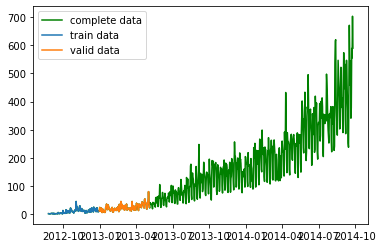

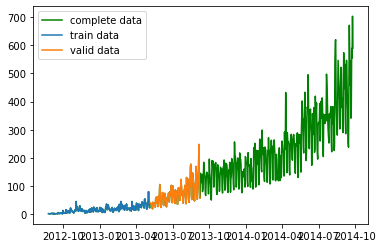

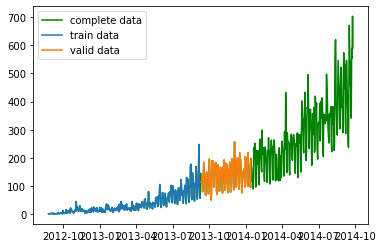

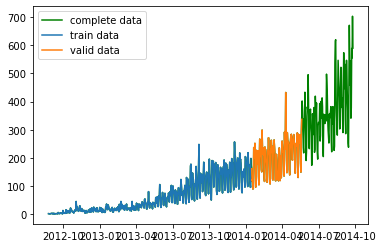

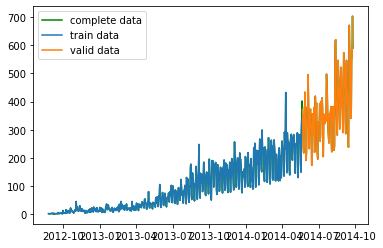

In [62]:
plt.figure(figsize=(6,4))

for train_index,test_index in time_series_cv.split(data):
    plt.plot(data.index,data['count'],label='complete data',color='green')
    
    plt.plot(data[train_index[0]:train_index[-1]].index,data['count'][train_index[0]:train_index[-1]],label='train data')
    plt.plot(data[test_index[0]:test_index[-1]].index,data['count'][test_index[0]:test_index[-1]],label='valid data')
    
    plt.legend(loc='best')
    plt.show()

###### Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

###### Creating Train and Valid Sets

In [55]:
model=LinearRegression(normalize=True)

In [63]:
i=0
for train_index,test_index in time_series_cv.split(data):
    print('--------------')
    print('TRAIN : ',train_index[0], ' to ',train_index[-1])
    print('TEST : ',test_index[0], ' to ',test_index[-1])
    
    x_train=(complete_data[train_index[0]:train_index[-1]]).drop('count',axis=1)
    y_train=(complete_data[train_index[0]:train_index[-1]]['count'])
    x_valid=(complete_data[test_index[0]:test_index[-1]]).drop('count',axis=1)
    y_valid=(complete_data[test_index[0]:test_index[-1]]['count'])
    
    
    
    print('Model training on set ',i+1)
    model.fit(x_train,y_train)
    preds_valid=model.predict(x_valid)
    rmse=sqrt(mean_squared_error(y_valid,preds_valid))
    print('The RMSE value is ',rmse)
    i=i+1

--------------
TRAIN :  0  to  126
TEST :  127  to  253
Model training on set  1
The RMSE value is  75.5968081832735
--------------
TRAIN :  0  to  253
TEST :  254  to  380
Model training on set  2
The RMSE value is  43.41602478272748
--------------
TRAIN :  0  to  380
TEST :  381  to  507
Model training on set  3
The RMSE value is  41.35785290787153
--------------
TRAIN :  0  to  507
TEST :  508  to  634
Model training on set  4
The RMSE value is  63.98681455252558
--------------
TRAIN :  0  to  634
TEST :  635  to  761
Model training on set  5
The RMSE value is  145.44776052271462


In [65]:
# tHis means our model is not performing well on recent data
## if RMSE is large,
##this generally means our model is failing to account for important features underlying our data.

#### Walk Forward Cross Validation

In [47]:
for train_index,test_index in time_series_cv.split(data):
    print('---------------')
    print('TRAIN : ',train_index[-1]-126, ' to ',train_index[-1])
    print('TEST : ',test_index[-1]-126, ' to ',test_index[-1])## taking only 126 values at a time

---------------
TRAIN :  0  to  126
TEST :  127  to  253
---------------
TRAIN :  127  to  253
TEST :  254  to  380
---------------
TRAIN :  254  to  380
TEST :  381  to  507
---------------
TRAIN :  381  to  507
TEST :  508  to  634
---------------
TRAIN :  508  to  634
TEST :  635  to  761


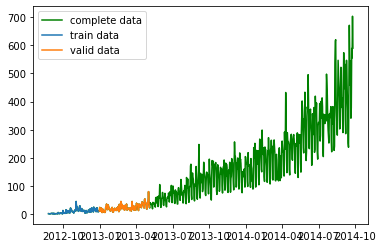

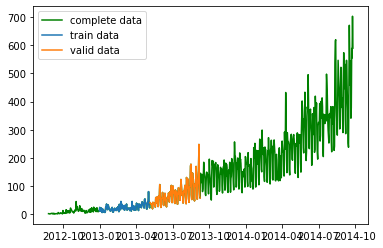

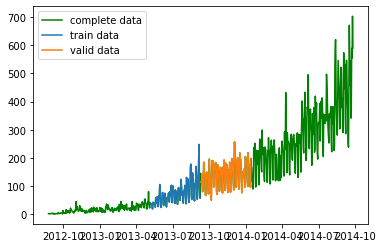

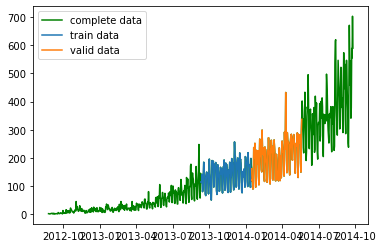

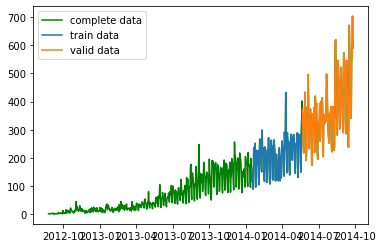

In [49]:
plt.figure(figsize=(6,4))

for train_index,test_index in time_series_cv.split(data):
    plt.plot(data.index,data['count'],label='complete data',color='green')
    
    plt.plot(data[(train_index[-1]-126):train_index[-1]].index,data['count'][(train_index[-1]-126):train_index[-1]],label='train data')
    plt.plot(data[(test_index[-1]-126):test_index[-1]].index,data['count'][(test_index[-1]-126):test_index[-1]],label='valid data')
    
    plt.legend(loc='best')
    plt.show()